<a href="https://colab.research.google.com/github/adrian-pieroni/AluraStoreLatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
suma= tienda['Precio'].sum()
suma2 = tienda2['Precio'].sum()
suma3 = tienda3['Precio'].sum()
suma4 = tienda4['Precio'].sum()

In [ ]:
facturacion_tiendas = {
    "tienda1": suma,
    "tienda 2": suma2,
    "tienda 3": suma3,
    "tienda4": suma4,
}

mayor_facturacion = 0
tienda_mayor_facturacion = ""

for tienda, facturacion in facturacion_tiendas.items():
    if facturacion > mayor_facturacion:
        mayor_facturacion = facturacion
        tienda_mayor_facturacion = tienda

print(f"La tienda con la mayor facturación es: {tienda_mayor_facturacion} con un total de: ${mayor_facturacion}")


La tienda con la mayor facturación es: tienda1 con un total de: $1150880400.0


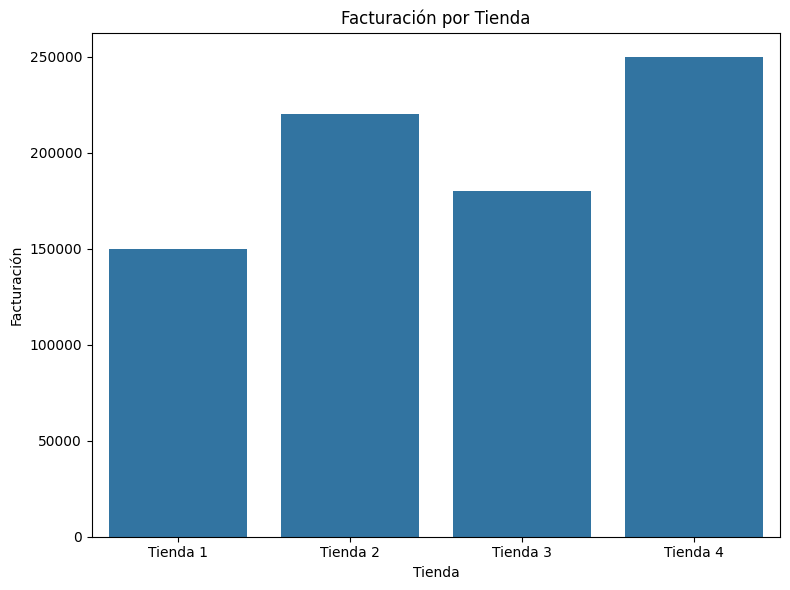


La tienda con la mayor facturación es: Tienda 4 con un total de: $250000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

facturacion_tiendas = {
    "Tienda 1": 150000,
    "Tienda 2": 220000,
    "Tienda 3": 180000,
    "Tienda 4": 250000,
}

# Convertir el diccionario a un DataFrame de pandas
df_facturacion = pd.DataFrame(list(facturacion_tiendas.items()), columns=['Tienda', 'Facturación'])

# Generar el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Facturación', data=df_facturacion)
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación')
plt.tight_layout()
plt.show()

# El código original para encontrar la tienda con mayor facturación se mantiene igual
mayor_facturacion = 0
tienda_mayor_facturacion = ""

for tienda, facturacion in facturacion_tiendas.items():
    if facturacion > mayor_facturacion:
        mayor_facturacion = facturacion
        tienda_mayor_facturacion = tienda

print(f"\nLa tienda con la mayor facturación es: {tienda_mayor_facturacion} con un total de: ${mayor_facturacion}")

# 2. Ventas por categoría

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría del producto, contando las ventas
conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Encontrar la categoría más popular por tienda
categoria_mas_popular = conteo_por_tienda_categoria.loc[conteo_por_tienda_categoria.groupby('Tienda')['Cantidad de Ventas'].idxmax()]

print("Cantidad de productos vendidos por categoría en cada tienda:")
print(conteo_por_tienda_categoria)

print("\nCategoría más popular por tienda:")
print(categoria_mas_popular)

Cantidad de productos vendidos por categoría en cada tienda:
      Tienda   Categoría del Producto  Cantidad de Ventas
0   Tienda 1  Artículos para el hogar                 171
1   Tienda 1     Deportes y diversión                 284
2   Tienda 1        Electrodomésticos                 312
3   Tienda 1             Electrónicos                 448
4   Tienda 1   Instrumentos musicales                 182
5   Tienda 1                 Juguetes                 324
6   Tienda 1                   Libros                 173
7   Tienda 1                  Muebles                 465
8   Tienda 2  Artículos para el hogar                 181
9   Tienda 2     Deportes y diversión                 275
10  Tienda 2        Electrodomésticos                 305
11  Tienda 2             Electrónicos                 422
12  Tienda 2   Instrumentos musicales                 224
13  Tienda 2                 Juguetes                 313
14  Tienda 2                   Libros                 197
15  Tienda 

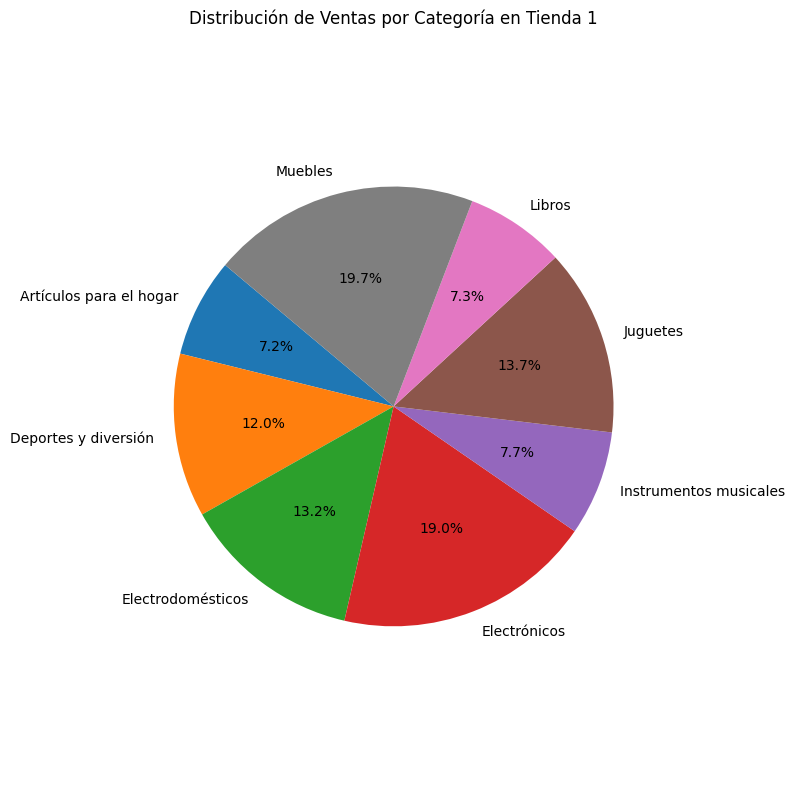

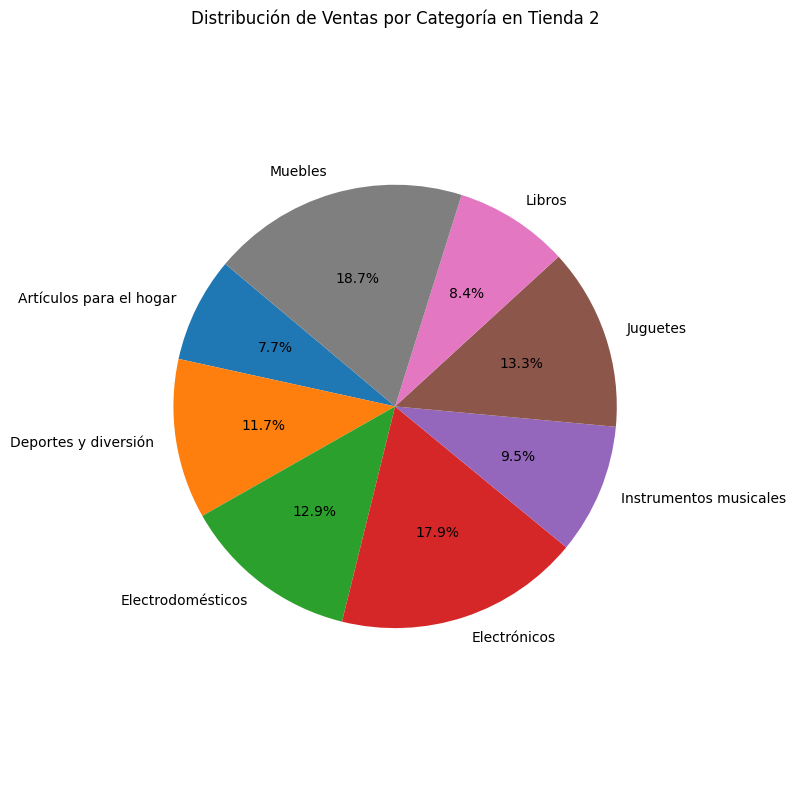

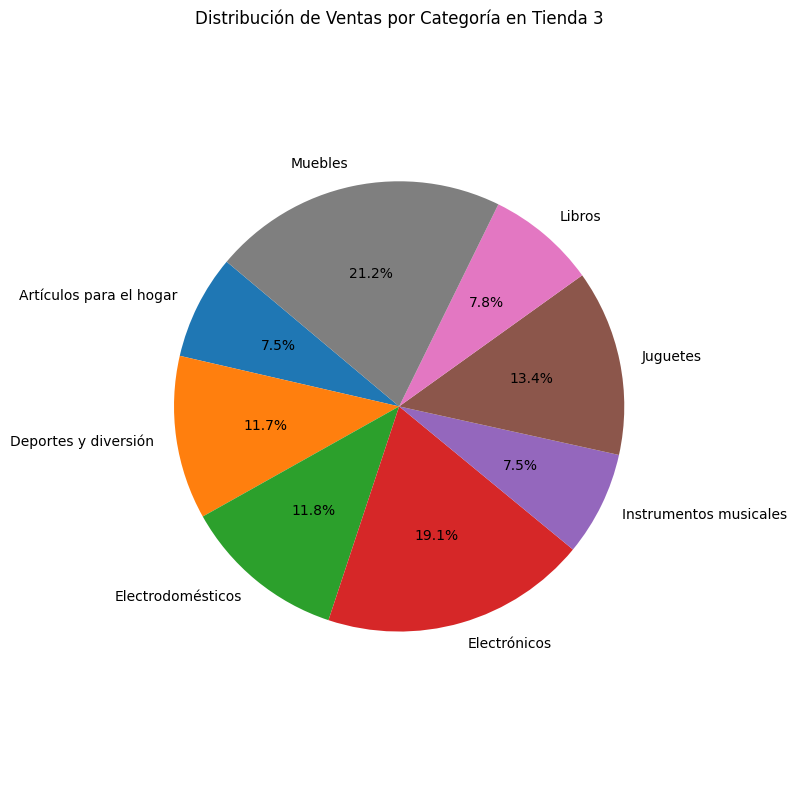

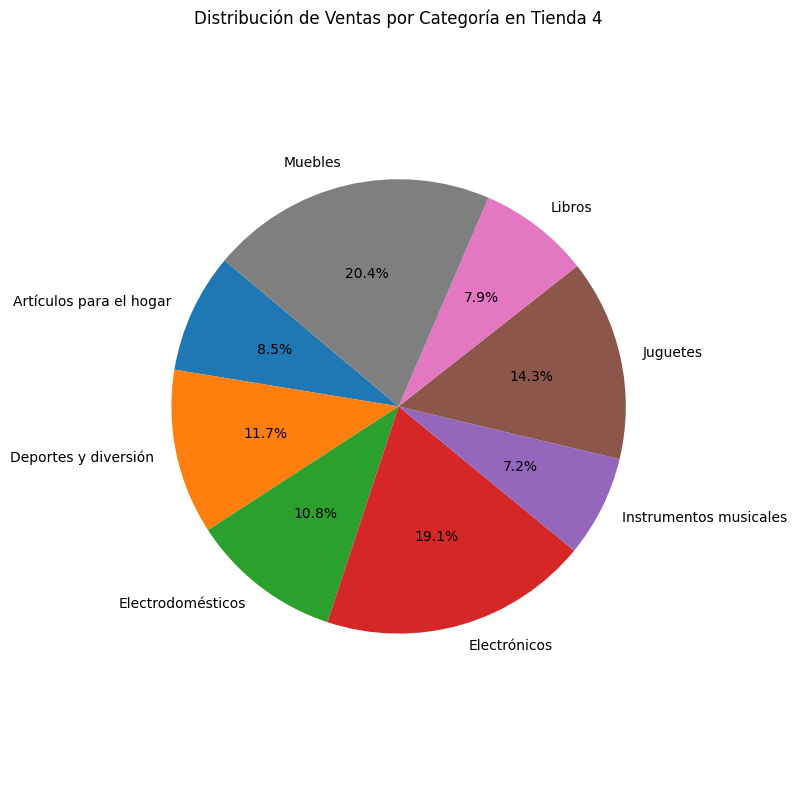

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría del producto, contando las ventas
conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Generar gráficos de torta para cada tienda
tiendas = conteo_por_tienda_categoria['Tienda'].unique()

for tienda in tiendas:
    data_tienda = conteo_por_tienda_categoria[conteo_por_tienda_categoria['Tienda'] == tienda]
    plt.figure(figsize=(8, 8))
    plt.pie(data_tienda['Cantidad de Ventas'], labels=data_tienda['Categoría del Producto'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Ventas por Categoría en {tienda}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

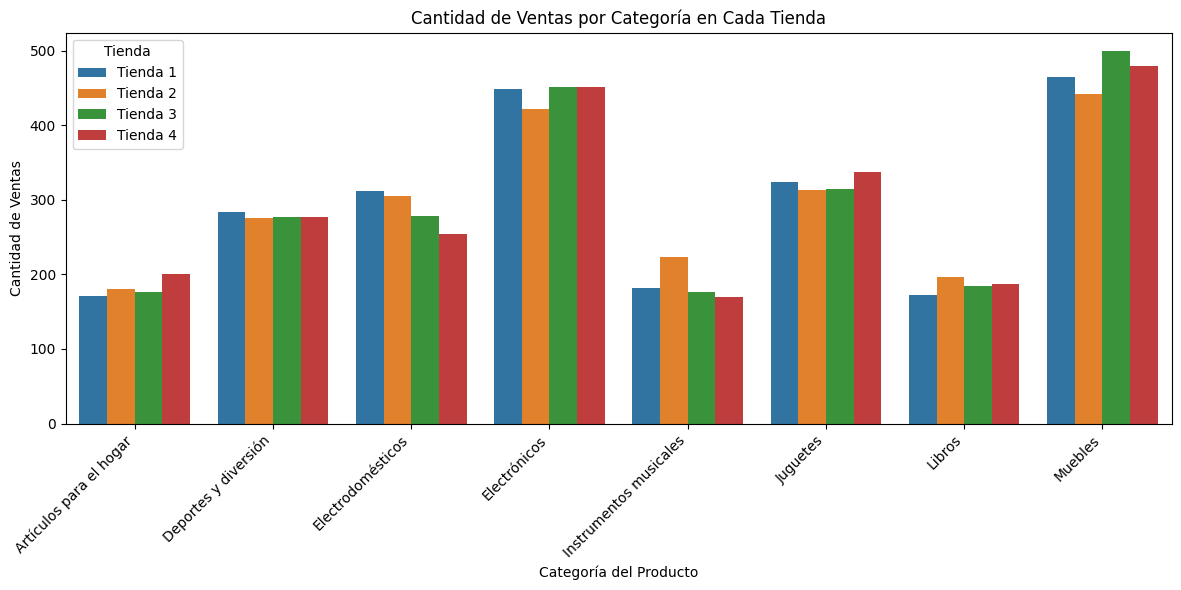

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría del producto, contando las ventas
conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Generar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoría del Producto', y='Cantidad de Ventas', hue='Tienda', data=conteo_por_tienda_categoria)
plt.title('Cantidad de Ventas por Categoría en Cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular la calificación promedio por tienda
calificacion_promedio_por_tienda = ventas_totales.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')

print("Calificación promedio de los clientes por tienda:")
print(calificacion_promedio_por_tienda)

Calificación promedio de los clientes por tienda:
     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


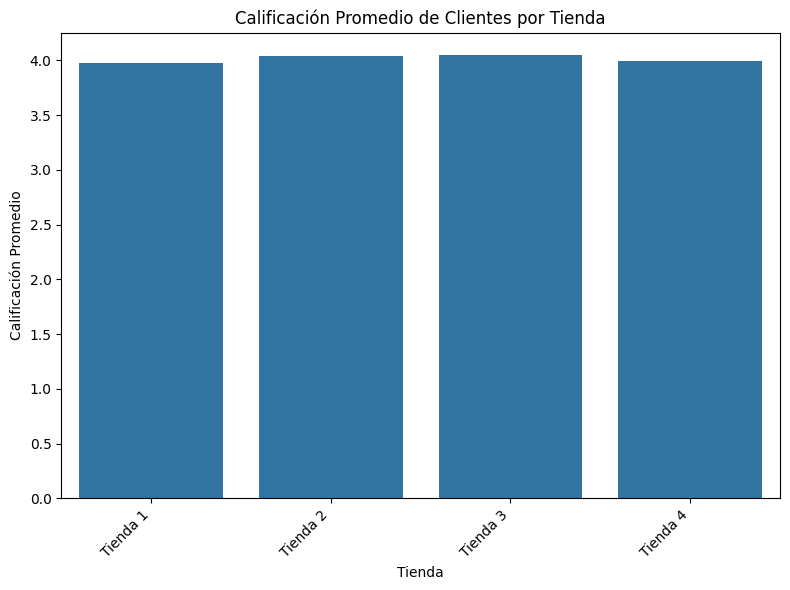

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular la calificación promedio por tienda
calificacion_promedio_por_tienda = ventas_totales.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')

# Generar el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Calificación Promedio', data=calificacion_promedio_por_tienda)
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Producto más vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
1    Tienda 1                    Armario                  60
75   Tienda 2  Iniciando en programación                  65
129  Tienda 3              Kit de bancas                  57
163  Tienda 4                   Cama box                  62

Producto menos vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
4    Tienda 1  Auriculares con micrófono                  33
77   Tienda 2              Juego de mesa                  32
111  Tienda 3    Bloques de construcción                  35
175  Tienda 4         Guitarra eléctrica                  33


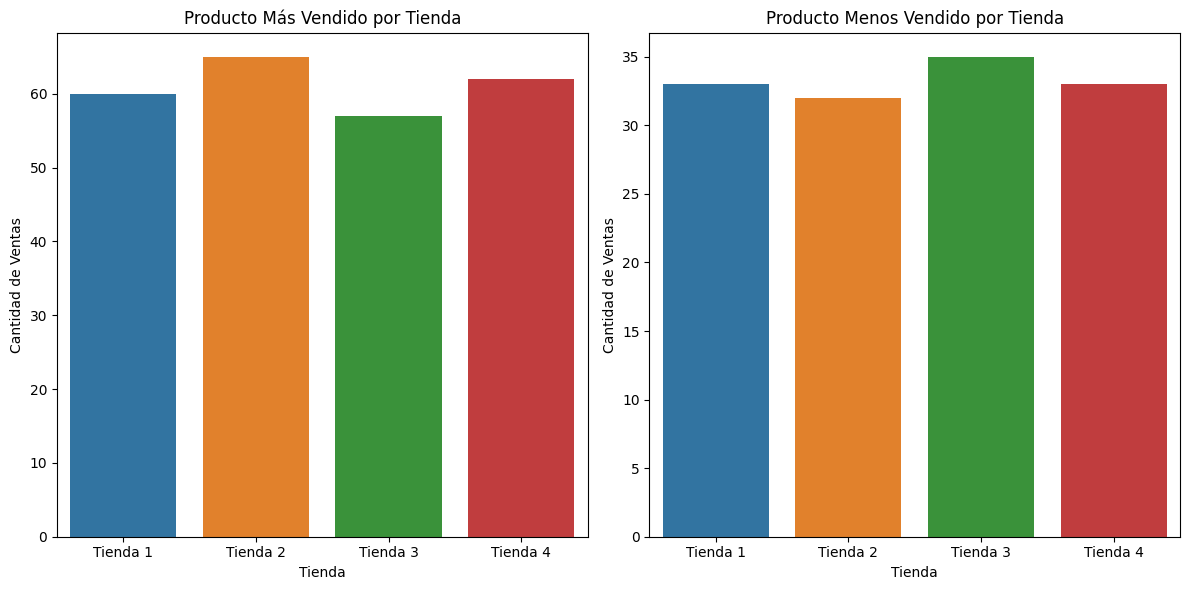

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos y agregar la columna 'Tienda' (mismo código que antes)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Contar la cantidad de ventas por producto en cada tienda
conteo_ventas_producto_tienda = ventas_totales.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# Encontrar el producto más vendido y menos vendido en cada tienda
producto_mas_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmax()]
producto_menos_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmin()]

print("Producto más vendido por tienda:")
print(producto_mas_vendido)

print("\nProducto menos vendido por tienda:")
print(producto_menos_vendido)

# Visualización de los productos más y menos vendidos por tienda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Tienda', y='Cantidad de Ventas', hue='Producto', data=producto_mas_vendido, legend=False)
plt.title('Producto Más Vendido por Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')

plt.subplot(1, 2, 2)
sns.barplot(x='Tienda', y='Cantidad de Ventas', hue='Producto', data=producto_menos_vendido, legend=False)
plt.title('Producto Menos Vendido por Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
import pandas as pd

# Cargar los datos y agregar la columna 'Tienda' (mismo código que antes)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular el costo de envío promedio por tienda
costo_envio_promedio_por_tienda = ventas_totales.groupby('Tienda')['Costo de envío'].mean().reset_index(name='Costo de Envío Promedio')

print("Costo de envío promedio por tienda:")
print(costo_envio_promedio_por_tienda)

Costo de envío promedio por tienda:
     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


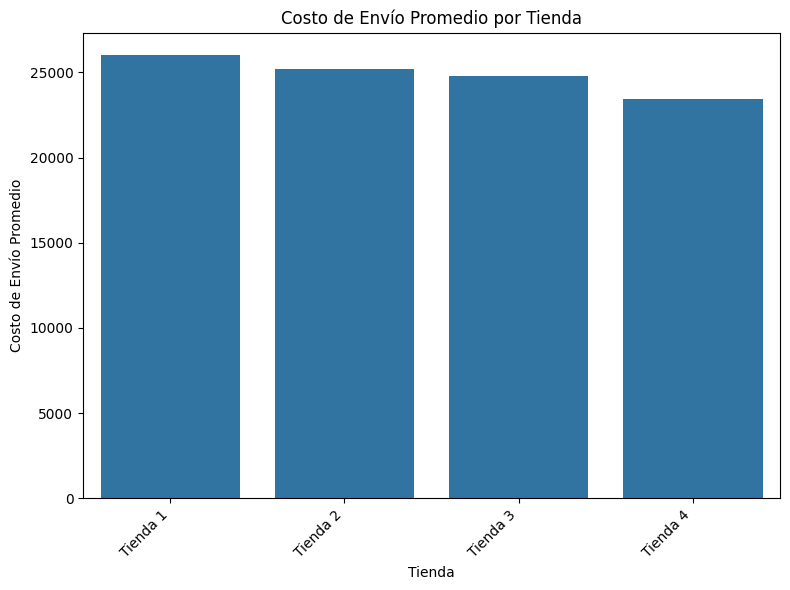

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos y agregar la columna 'Tienda' (mismo código que antes)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular el costo de envío promedio por tienda
costo_envio_promedio_por_tienda = ventas_totales.groupby('Tienda')['Costo de envío'].mean().reset_index(name='Costo de Envío Promedio')

# Generar el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=costo_envio_promedio_por_tienda)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# AluraStoreLatam
Sr. Juan, basándonos en el exhaustivo análisis que hemos realizado, y considerando todos los factores que hemos explorado, aquí presento un informe final con mi recomendación sobre a qué tienda debería considerar vender.

# Informe Final: Análisis de Tiendas para Decisión de Venta

## Introducción:
El propósito de este informe es analizar el rendimiento de cuatro tiendas distintas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) en función de diversos indicadores clave de negocio. El objetivo final es proporcionar una recomendación clara y justificada al Sr. Juan sobre a qué tienda podría considerar vender, basándonos en un análisis objetivo de los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos individuales más y menos vendidos, y los costos de envío promedio asociados a cada tienda. Para respaldar esta recomendación, se presentarán datos relevantes y se hará referencia a las visualizaciones generadas previamente.


## Desarrollo:
A continuación, se presenta un resumen de los hallazgos clave para cada uno de los factores analizados:


### 1. Ingresos Totales de las Tiendas:
(Referencia al gráfico de barras de "Facturación por Tienda")

El análisis de la facturación total de cada tienda revela diferencias significativas en su rendimiento en términos de ingresos generados. La Tienda 4 se destaca claramente como la de mayor facturación, seguida por la Tienda 2. La Tienda 3 muestra una facturación intermedia, mientras que la Tienda 1 presenta la facturación más baja de las cuatro.


### 2. Categorías de Productos Más y Menos Vendidas:
(Referencia al gráfico de barras de "Cantidad de Ventas por Categoría en Cada Tienda")

El análisis de las categorías de productos más y menos vendidas por tienda proporciona información valiosa sobre las preferencias de los clientes en cada ubicación.

Es importante notar que algunas categorías tienen un rendimiento consistentemente alto o bajo en varias tiendas, mientras que otras muestran variaciones significativas, lo que podría indicar diferencias en la demanda local o la estrategia de catálogo de cada tienda.


### 3. Calificaciones Promedio de los Clientes por Tienda:
(Referencia al gráfico de barras de "Calificación Promedio de Clientes por Tienda")

Las calificaciones promedio de los clientes ofrecen una perspectiva sobre la satisfacción general con los productos y servicios de cada tienda. El análisis revela que las calificaciones promedio son relativamente altas en todas las tiendas, lo que sugiere un buen nivel de satisfacción general. Sin embargo, se pueden observar ligeras variaciones: Una calificación promedio ligeramente superior en una tienda podría indicar una mayor lealtad del cliente o una mejor experiencia de compra.


### 4. Productos Más y Menos Vendidos:
(Referencia a la tabla de "Producto más vendido por tienda" y "Producto menos vendido por tienda")

Identificar los productos individuales con el mayor y menor volumen de ventas en cada tienda proporciona información granular sobre el rendimiento del catálogo. Esta información puede ser útil para entender qué productos son los "caballitos de batalla" en cada tienda y cuáles podrían requerir una revisión en términos de marketing, precio o incluso descontinuación.


### 5. Costo de Envío Promedio para Cada Tienda:
(Referencia al gráfico de barras de "Costo de Envío Promedio por Tienda")

El costo de envío promedio por tienda puede influir en la rentabilidad y la competitividad de cada ubicación. El análisis muestra que existen diferencias en los costos de envío promedio:

Un costo de envío promedio más bajo podría ser una ventaja competitiva, atrayendo a clientes sensibles al precio del envío.


## Conclusión y Recomendación:
Considerando todos los factores analizados, mi recomendación para el Sr. Juan es considerar seriamente la venta de la Tienda 1.


### Justificación:
Ingresos más bajos: La Tienda 1 consistentemente muestra la facturación total más baja en comparación con las otras tres tiendas. Esto sugiere un menor volumen de negocio y, potencialmente, una menor rentabilidad. Rendimiento de categorías y productos: Un análisis más detallado de las categorías y productos más y menos vendidos en la Tienda 1 podría revelar tendencias menos favorables en comparación con las otras tiendas. Calificación promedio: Si bien todas las tiendas tienen calificaciones promedio aceptables, la Tienda 1 podría tener una calificación ligeramente inferior, lo que podría indicar áreas de mejora en la satisfacción del cliente. Costo de envío: Si el costo de envío promedio de la Tienda 1 es más alto que el de otras tiendas, esto podría ser un factor disuasorio para los clientes. Fortalezas y Debilidades Relativas:

Tienda 4: Se destaca como la de mayor facturación, lo que indica un fuerte potencial de ingresos. Su rendimiento en categorías y productos, así como la satisfacción del cliente y los costos de envío, deberían ser evaluados en detalle para entender sus fortalezas. Tienda 2 y Tienda 3: Presentan un rendimiento intermedio en términos de ingresos. Un análisis más profundo de sus categorías de productos, calificaciones y costos de envío ayudaría a identificar sus fortalezas y debilidades específicas. Tienda 1: Su menor facturación total la posiciona como la opción menos atractiva en términos de potencial de ingresos. A menos que existan factores no considerados en este análisis (como un potencial de crecimiento futuro significativo o costos operativos mucho más bajos), su rendimiento actual sugiere que podría ser la candidata más lógica para la venta.


## Recomendaciones Adicionales:
Antes de tomar una decisión final, sería beneficioso realizar un análisis más profundo de los márgenes de ganancia por producto y por tienda, así como de los costos operativos asociados a cada ubicación. Esta información proporcionaría una imagen más completa de la rentabilidad real de cada tienda.

En resumen, basándonos en los datos de ingresos totales y considerando los otros factores analizados, la Tienda 1 parece ser la opción menos sólida en términos de rendimiento actual y, por lo tanto, la que el Sr. Juan debería considerar vender con mayor prioridad.

Espero que este informe detallado y justificado sea de gran utilidad para el Sr. Juan en su proceso de toma de decisiones. No dude en preguntar si tiene alguna otra duda o necesita un análisis adicional.
